In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/malicious_phish.csv')
print(df[0:100000])
malicious_phish_only100000 = df[0:100000]
malicious_phish_only100000.to_csv("malicious_phish.csv", index=False)
print("File saved successfully.")


                                                     url        type
0                                       br-icloud.com.br    phishing
1                    mp3raid.com/music/krizz_kaliko.html      benign
2                        bopsecrets.org/rexroth/cr/1.htm      benign
3      http://www.garage-pirenne.be/index.php?option=...  defacement
4      http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                  ...         ...
99995  http://www.fredhopper.nl/careers-listing/syste...  defacement
99996  http://www.qrscelltech.com/de/newsletter?tmpl=...  defacement
99997                      veromi.com/FL/Joan-Scott.aspx      benign
99998                livesoccertv.com/countries/morocco/      benign
99999  http://www.graz4u.at/de/news/122-per-flugzeug-...  defacement

[100000 rows x 2 columns]
File saved successfully.


In [ ]:
import re
#URL Categorizing Function
def categorize_url(url):
    URL_Length = len(url)
    https_presence = int("https" in url)
    digit_count = sum(c.isdigit() for c in url)

    def detect_domain_abnormality(url):
        pattern = r'\.(co|info|xxx|top|biz|pw)$'
        if re.search(pattern, url):
            return 1  # Abnormal domain pattern detected
        else:
            return 0  # Normal domain pattern

    Domain_Abnormality = detect_domain_abnormality(url)
    text_encoding_presence = int("%" in url)
    letter_count = sum(c.isalpha() for c in url)
    shortening_service = int("bit.ly" in url.lower() or "goo.gl" in url.lower() or "tinyurl.com" in url.lower())
    ip_address_presence = 0

    return URL_Length, Domain_Abnormality, https_presence, text_encoding_presence, digit_count, letter_count, shortening_service

# Apply categorization function to each URL and create new columns
malicious_phish_only100000['URL_Length'], malicious_phish_only100000['Domain_Abnormality'], malicious_phish_only100000['HTTPS_Presence'], malicious_phish_only100000['Text_Encoding'], malicious_phish_only100000['Digit_Count'], malicious_phish_only100000['Letter_Count'], malicious_phish_only100000['Shortening_Service'] = zip(*malicious_phish_only100000['url'].apply(categorize_url))# Print the updated DataFrame
print(malicious_phish_only100000)

<ipython-input-4-fcf93226f8bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malicious_phish_only100000['URL_Length'], malicious_phish_only100000['Domain_Abnormality'], malicious_phish_only100000['HTTPS_Presence'], malicious_phish_only100000['Text_Encoding'], malicious_phish_only100000['Digit_Count'], malicious_phish_only100000['Letter_Count'], malicious_phish_only100000['Shortening_Service'] = zip(*malicious_phish_only100000['url'].apply(categorize_url))# Print the updated DataFrame
<ipython-input-4-fcf93226f8bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

                                                     url        type  \
0                                       br-icloud.com.br    phishing   
1                    mp3raid.com/music/krizz_kaliko.html      benign   
2                        bopsecrets.org/rexroth/cr/1.htm      benign   
3      http://www.garage-pirenne.be/index.php?option=...  defacement   
4      http://adventure-nicaragua.net/index.php?optio...  defacement   
...                                                  ...         ...   
99995  http://www.fredhopper.nl/careers-listing/syste...  defacement   
99996  http://www.qrscelltech.com/de/newsletter?tmpl=...  defacement   
99997                      veromi.com/FL/Joan-Scott.aspx      benign   
99998                livesoccertv.com/countries/morocco/      benign   
99999  http://www.graz4u.at/de/news/122-per-flugzeug-...  defacement   

       URL_Length  Domain_Abnormality  HTTPS_Presence  Text_Encoding  \
0              16                   0               0          

<ipython-input-4-fcf93226f8bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malicious_phish_only100000['URL_Length'], malicious_phish_only100000['Domain_Abnormality'], malicious_phish_only100000['HTTPS_Presence'], malicious_phish_only100000['Text_Encoding'], malicious_phish_only100000['Digit_Count'], malicious_phish_only100000['Letter_Count'], malicious_phish_only100000['Shortening_Service'] = zip(*malicious_phish_only100000['url'].apply(categorize_url))# Print the updated DataFrame
<ipython-input-4-fcf93226f8bb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

<ipython-input-5-f47955683b68>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='URL_Length',palette='CMRmap', ci=None)
<ipython-input-5-f47955683b68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='URL_Length',palette='CMRmap', ci=None)


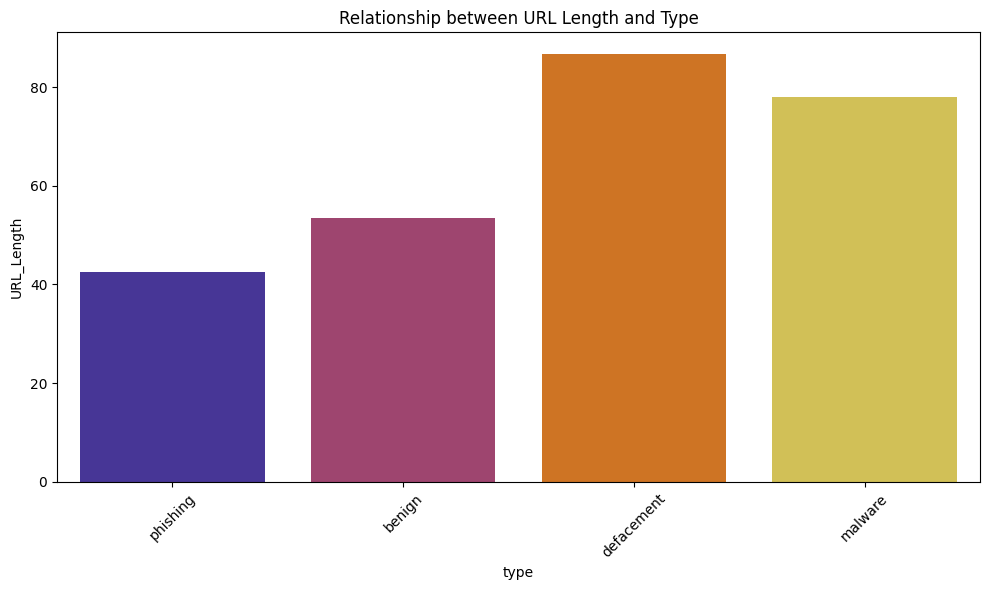

In [ ]:
#Plot URL Length
plt.figure(figsize=(10, 6))
sns.barplot(data=malicious_phish_only100000, x='type', y='URL_Length',palette='CMRmap', ci=None)
plt.title("Relationship between URL Length and Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-32-0903e3078907>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Domain_Abnormality', estimator=lambda x: sum(x == 1), palette='CMRmap', ci=None)
<ipython-input-32-0903e3078907>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Domain_Abnormality', estimator=lambda x: sum(x == 1), palette='CMRmap', ci=None)


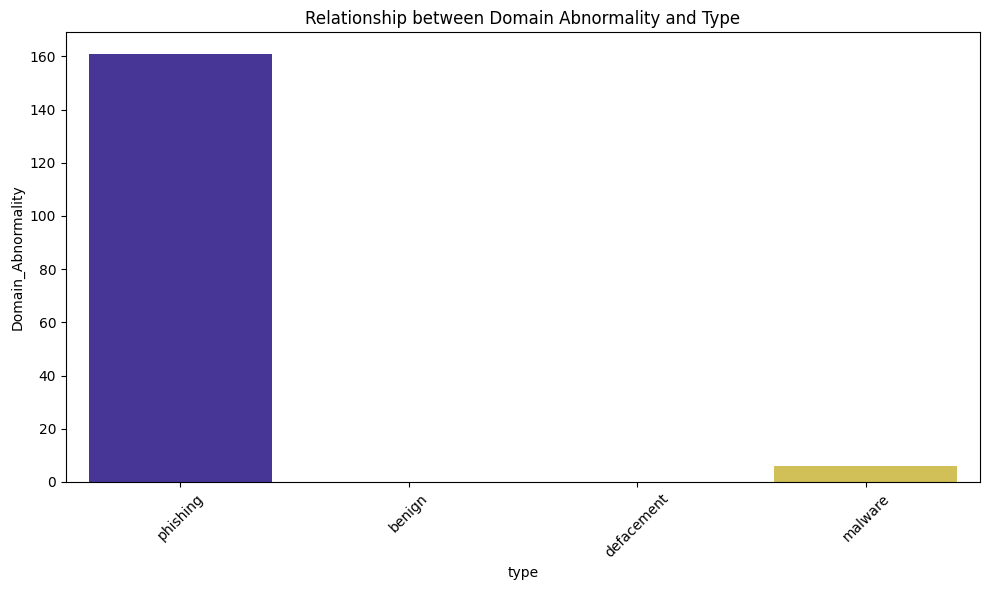

In [ ]:
#plot for Domain Abnormality
plt.figure(figsize=(10, 6))
sns.barplot(data=malicious_phish_only100000, x='type', y='Domain_Abnormality', estimator=lambda x: sum(x == 1), palette='CMRmap', ci=None)
plt.title("Relationship between Domain Abnormality and Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-33-d20d2d3b0eb0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='HTTPS_Presence',estimator=lambda x: sum(x == 1), palette='CMRmap', ci=None)
<ipython-input-33-d20d2d3b0eb0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='HTTPS_Presence',estimator=lambda x: sum(x == 1), palette='CMRmap', ci=None)


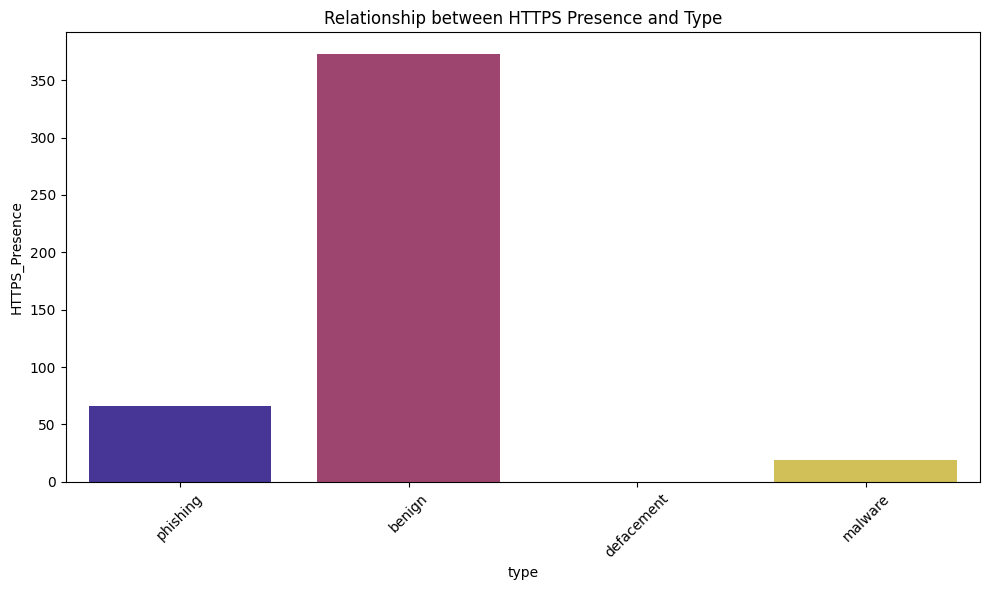

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=malicious_phish_only100000, x='type', y='HTTPS_Presence',estimator=lambda x: sum(x == 1), palette='CMRmap', ci=None)
plt.title("Relationship between HTTPS Presence and Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-34-65004811ff56>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Text_Encoding', estimator=lambda x: sum(x == 1), palette='CMRmap', ci=None)
<ipython-input-34-65004811ff56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Text_Encoding', estimator=lambda x: sum(x == 1), palette='CMRmap', ci=None)


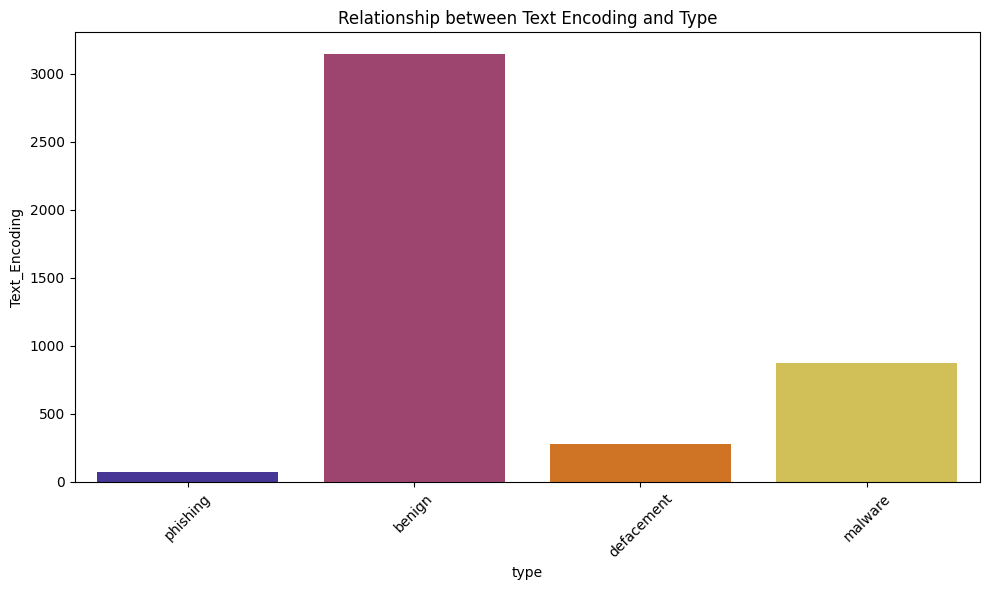

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=malicious_phish_only100000, x='type', y='Text_Encoding', estimator=lambda x: sum(x == 1), palette='CMRmap', ci=None)
plt.title("Relationship between Text Encoding and Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-27-cceb0507a0fb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Digit_Count',palette='CMRmap', ci=None)
<ipython-input-27-cceb0507a0fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Digit_Count',palette='CMRmap', ci=None)


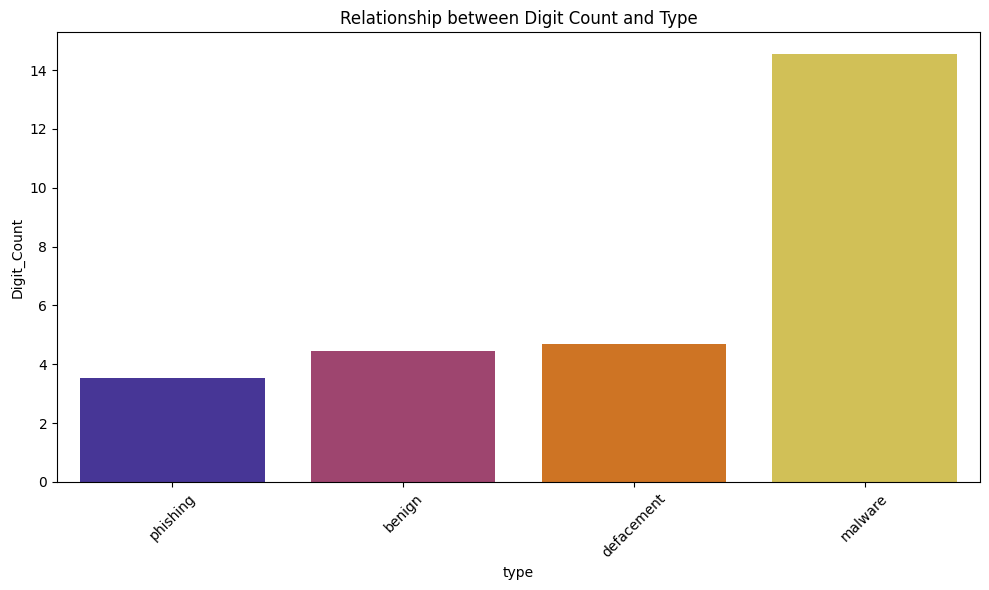

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=malicious_phish_only100000, x='type', y='Digit_Count',palette='CMRmap', ci=None)
plt.title("Relationship between Digit Count and Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-28-ba025ffa0c1e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Letter_Count',palette='CMRmap', ci=None)
<ipython-input-28-ba025ffa0c1e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Letter_Count',palette='CMRmap', ci=None)


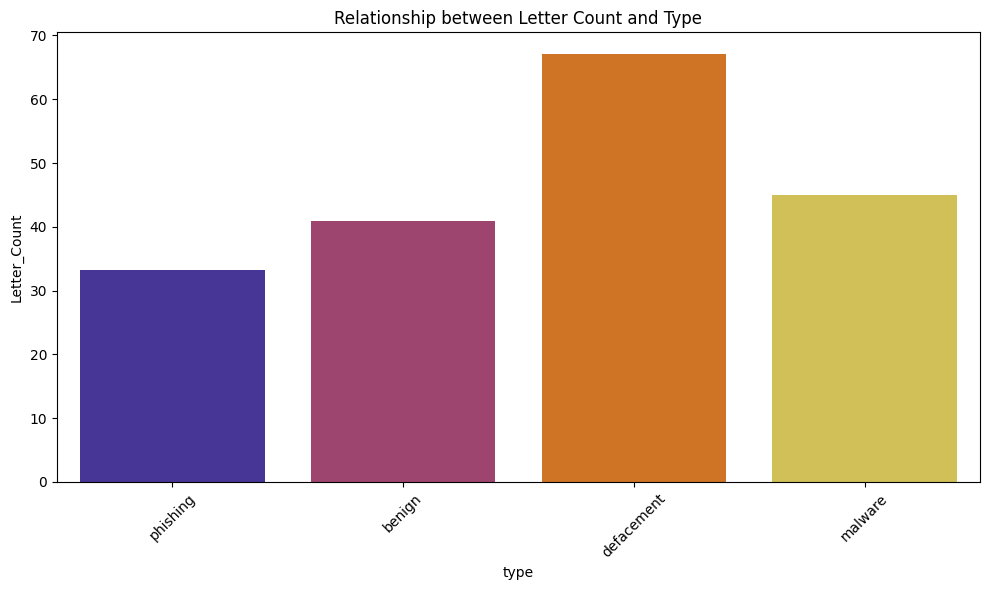

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=malicious_phish_only100000, x='type', y='Letter_Count',palette='CMRmap', ci=None)
plt.title("Relationship between Letter Count and Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-36-49f398c77e34>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Shortening_Service', palette='CMRmap', ci=None)
<ipython-input-36-49f398c77e34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=malicious_phish_only100000, x='type', y='Shortening_Service', palette='CMRmap', ci=None)


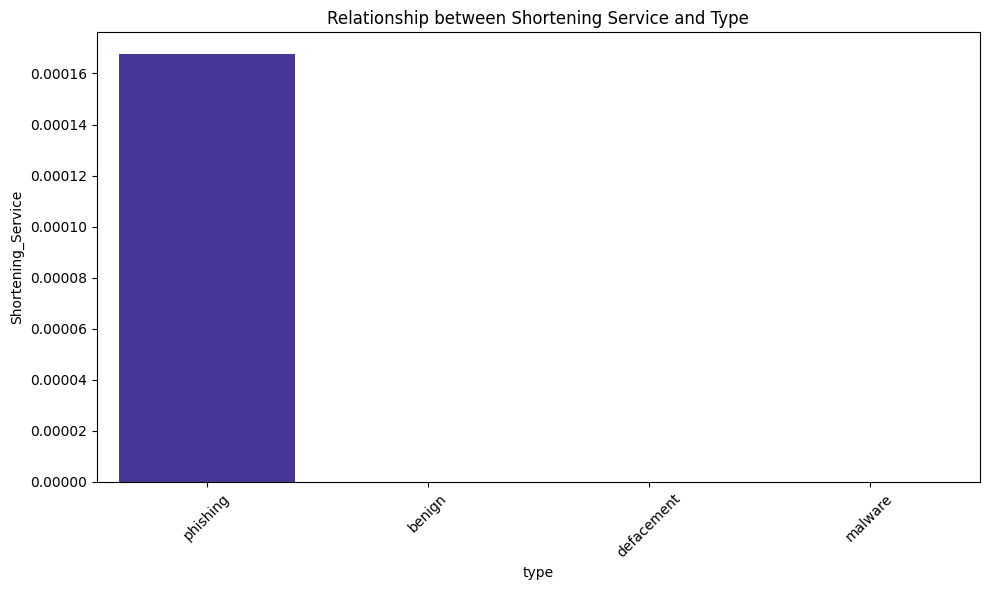

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=malicious_phish_only100000, x='type', y='Shortening_Service', palette='CMRmap', ci=None)
plt.title("Relationship between Shortening Service and Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#make numerical values out of x (number of digits, length, https presence, etc.)
#malicious_phish_only100000.drop(columns=['url'], inplace=True)
label_encoder = LabelEncoder()
malicious_phish_only100000.loc[:, 'type'] = label_encoder.fit_transform(malicious_phish_only100000['type'])
malicious_phish_only100000.head()

X = malicious_phish_only100000[['URL_Length', 'Domain_Abnormality', 'HTTPS_Presence', 'Text_Encoding', 'Digit_Count', 'Letter_Count', 'Shortening_Service']]
y = malicious_phish_only100000['type']

In [ ]:
print("Length of X:", len(X))
print("Length of y:", len(y))
print(malicious_phish_only100000.columns)

Length of X: 100000
Length of y: 100000
Index(['url', 'type', 'URL_Length', 'Domain_Abnormality', 'HTTPS_Presence',
       'Text_Encoding', 'Digit_Count', 'Letter_Count', 'Shortening_Service'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

Training set shapes - X_train: (80000, 7), y_train: (80000,)
Testing set shapes - X_test: (20000, 7), y_test: (20000,)


In [ ]:
#Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_model = LinearRegression()
linear_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
linear_mse_cv = abs(linear_scores.mean())
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)

print(linear_mse_cv)
print(linear_mse)

0.6197876683383516
0.6550483455571765


In [ ]:
#Ridge Regression Model
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_mse_cv = -ridge_scores.mean()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(ridge_mse_cv)
print(ridge_mse)

0.6197886036321976
0.6550441862243639


In [ ]:
#Lasso Regression Model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_mse_cv = -lasso_scores.mean()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(lasso_mse_cv)
print(lasso_mse)

0.6361116899518239
0.6695607801889216


In [ ]:
#Elastic Net Model
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_scores = cross_val_score(elastic_net_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
elastic_net_mse_cv = -elastic_net_scores.mean()
elastic_net_model.fit(X_train, y_train)
elastic_net_pred = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
print(elastic_net_mse_cv)
print(elastic_net_mse)

0.6332593760549943
0.6668257764255373


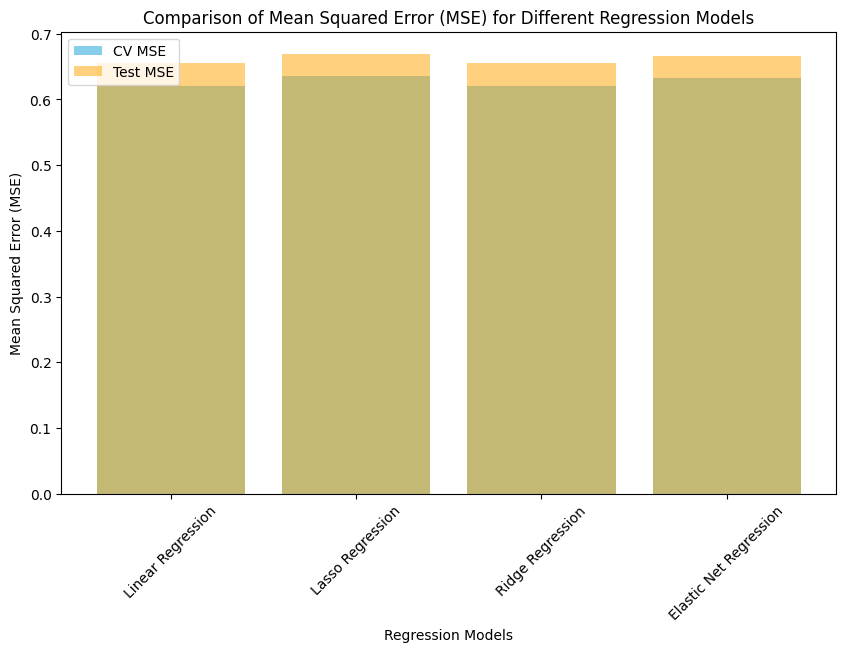

In [ ]:
#comparison plot
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression']
mse_values_cv = [linear_mse_cv, lasso_mse_cv, ridge_mse_cv, elastic_net_mse_cv]
mse_values_test = [linear_mse, lasso_mse, ridge_mse, elastic_net_mse]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values_cv, color='skyblue', label='CV MSE')
plt.bar(models, mse_values_test, color='orange', alpha=0.5, label='Test MSE')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Regression Models')
plt.legend()
plt.xticks(rotation=45)
plt.show()